In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Thiết lập chung
folder_path = 'data' # Tên thư mục chứa file của bạn
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
df_merged = pd.DataFrame()

# 2. Vòng lặp đọc từng file và gộp lại
for file in files:
    file_path = os.path.join(folder_path, file)
    # Đọc file
    df_temp = pd.read_csv(file_path)
    
    # Lấy tên mã từ tên file (ví dụ: ACB.VN.csv -> ACB)
    ticker = file.replace('.VN.csv', '').replace('.csv', '') 
    
    # Đảm bảo cột Date là datetime
    df_temp['Date'] = pd.to_datetime(df_temp['Date']) # Hoặc 'Ngay' tùy tên cột trong file bạn
    df_temp.set_index('Date', inplace=True)
    
    # Chỉ lấy cột giá điều chỉnh (Adj Close hoặc Gia_Dieu_Chinh) và đổi tên thành Ticker
    # Hãy kiểm tra tên cột trong file CSV của bạn, ở đây t ví dụ là 'Adj Close'
    col_name = 'Adj Close' if 'Adj Close' in df_temp.columns else 'Close' 
    df_merged[ticker] = df_temp[col_name]

# Xóa các dòng thiếu dữ liệu (nếu có)
df_merged.dropna(inplace=True)

print("Dữ liệu đã gộp:")
print(df_merged.head())

Dữ liệu đã gộp:
                     ACB           BID           CTG           HDB  \
Date                                                                 
2023-07-17  15171.796875  33509.386719  26365.619141  13046.056641   
2023-07-19  15171.796875  33545.652344  26543.166016  13375.659180   
2023-07-20  15171.796875  33545.652344  26321.234375  13494.730469   
2023-07-21  15240.760742  33908.308594  26365.619141  13653.491211   
2023-07-24  15206.279297  33944.570312  26498.779297  13693.181641   

                     LPB           MBB      STB           TCB           VCB  \
Date                                                                          
2023-07-17  10722.999023  11707.243164  28000.0  14600.457031  58926.640625   
2023-07-19  10924.054688  11581.358398  28250.0  14783.535156  59882.511719   
2023-07-20  10890.544922  11612.830078  27850.0  14600.457031  59039.093750   
2023-07-21  10890.544922  11738.714844  28750.0  14783.535156  59039.093750   
2023-07-24  10957.5

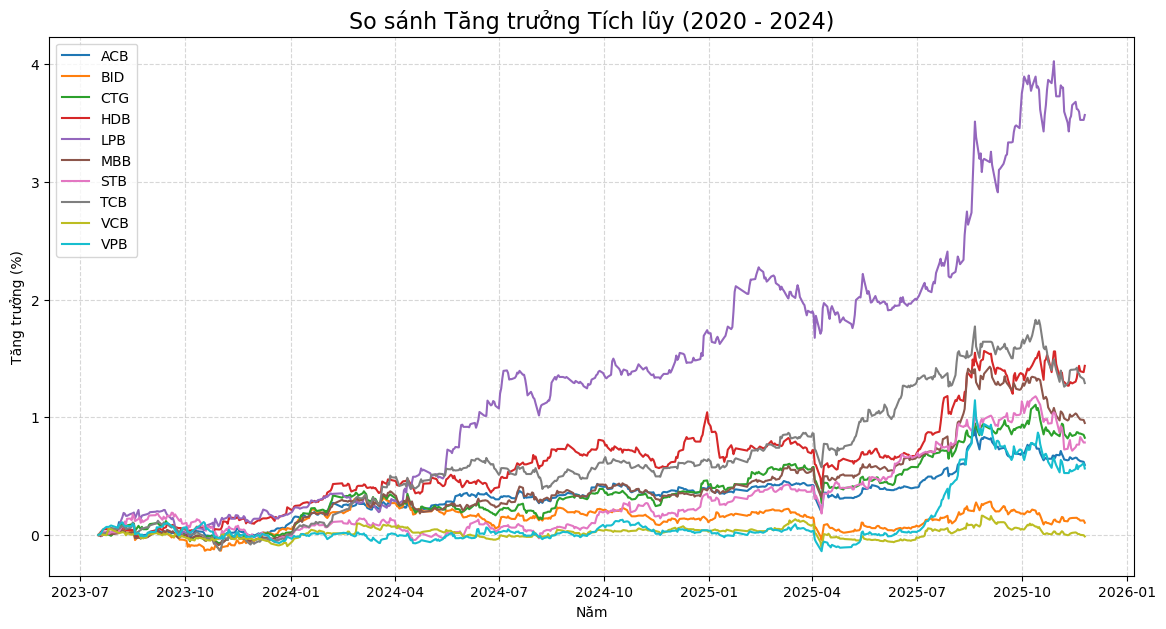

In [2]:
# Tính lợi nhuận tích lũy: (Giá hiện tại / Giá đầu tiên) - 1
df_cumulative = (df_merged / df_merged.iloc[0]) - 1

plt.figure(figsize=(14, 7))
for column in df_cumulative.columns:
    plt.plot(df_cumulative.index, df_cumulative[column], label=column, linewidth=1.5)

plt.title('So sánh Tăng trưởng Tích lũy (2020 - 2024)', fontsize=16)
plt.xlabel('Năm')
plt.ylabel('Tăng trưởng (%)')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

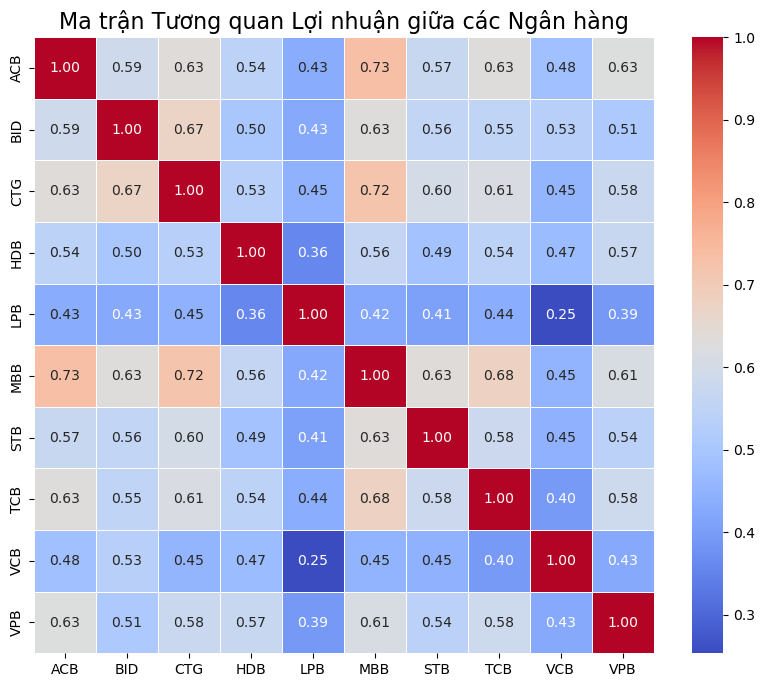

In [3]:
# Tính lợi nhuận hàng ngày (Daily Returns)
df_returns = df_merged.pct_change().dropna()

# Vẽ Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_returns.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Ma trận Tương quan Lợi nhuận giữa các Ngân hàng', fontsize=16)
plt.show()

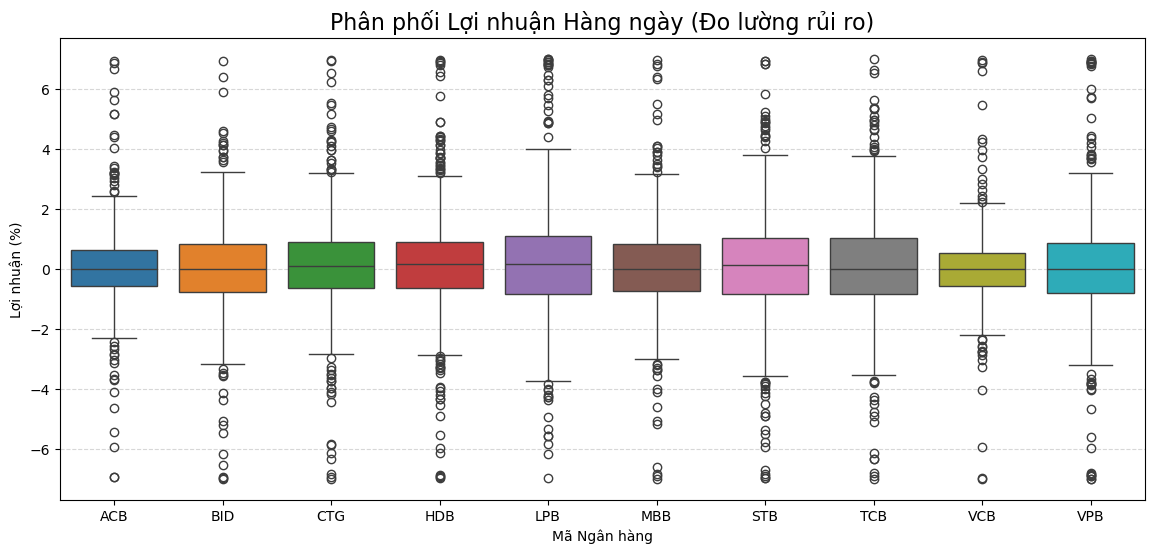

In [6]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_returns * 100) # Nhân 100 để ra đơn vị %
plt.title('Phân phối Lợi nhuận Hàng ngày (Đo lường rủi ro)', fontsize=16)
plt.ylabel('Lợi nhuận (%)')
plt.xlabel('Mã Ngân hàng')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

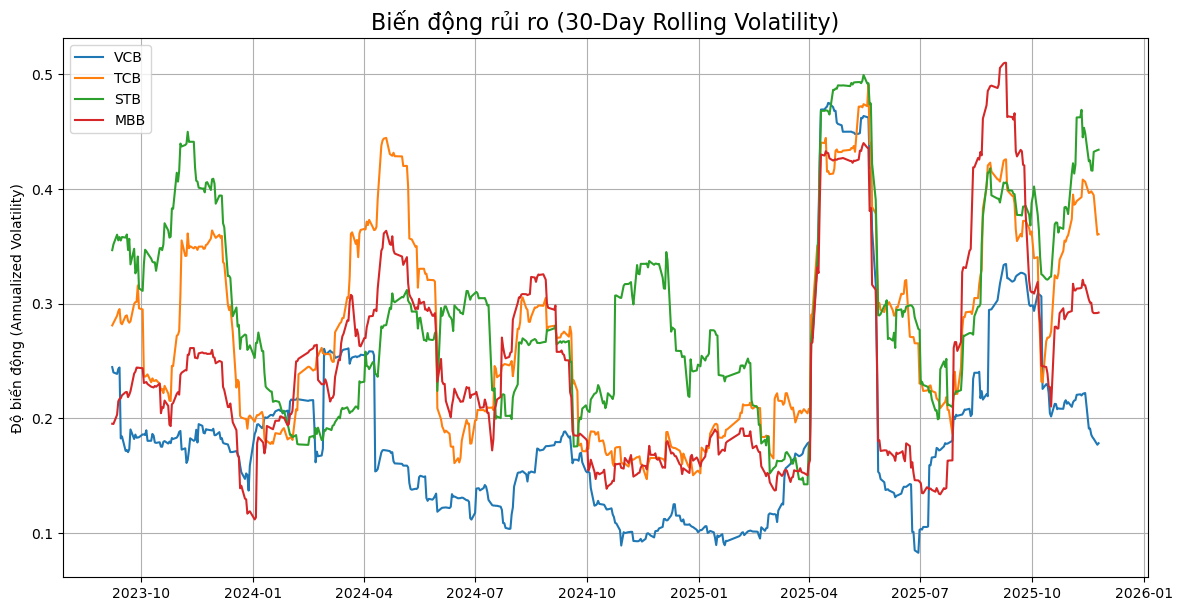

In [7]:
# Tính độ biến động cuộn (Rolling 30 days) và nhân căn bậc 2 của 252 (để quy về năm)
volatility = df_returns.rolling(window=30).std() * (252**0.5)

plt.figure(figsize=(14, 7))
# Chọn ra 3-4 ngân hàng đại diện để vẽ cho đỡ rối, ví dụ: VCB, TCB, STB
focus_banks = ['VCB', 'TCB', 'STB', 'MBB'] 

for col in focus_banks:
    if col in volatility.columns:
        plt.plot(volatility.index, volatility[col], label=col)

plt.title('Biến động rủi ro (30-Day Rolling Volatility)', fontsize=16)
plt.ylabel('Độ biến động (Annualized Volatility)')
plt.legend()
plt.grid(True)
plt.show()

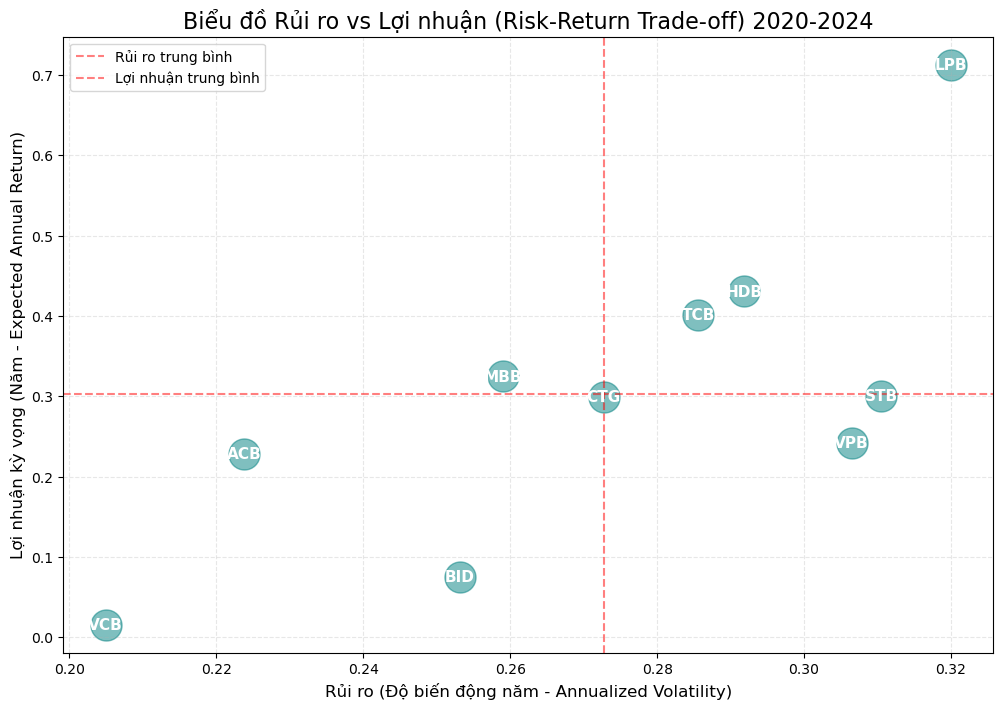

In [8]:
import matplotlib.pyplot as plt
import numpy as np # <--- Cần import cái này để tính np.pi và các hàm toán học

# -------------------------------------------------------------
# BƯỚC QUAN TRỌNG: TẠO LẠI BIẾN df_returns
# (Đảm bảo bạn đã chạy code gộp dữ liệu tạo ra df_merged ở Bước 0 rồi nhé)
# -------------------------------------------------------------
if 'df_merged' in globals():
    # Tính % lợi nhuận hàng ngày
    df_returns = df_merged.pct_change().dropna()
else:
    print("LỖI: Bạn chưa chạy Bước 0 (Gộp dữ liệu) để tạo df_merged. Hãy quay lại chạy code đó trước!")

# -------------------------------------------------------------
# VẼ BIỂU ĐỒ SCATTER
# -------------------------------------------------------------

# 1. Tính toán trung bình lợi nhuận và độ lệch chuẩn (rủi ro)
# mean() * 252: Quy đổi ra lợi nhuận năm (1 năm có khoảng 252 phiên giao dịch)
rets = df_returns.mean() * 252
risk = df_returns.std() * (252 ** 0.5) # Căn bậc 2 của 252

# 2. Vẽ biểu đồ
plt.figure(figsize=(12, 8))
plt.scatter(risk, rets, s=500, alpha=0.5, c='teal') # s=500 là độ to của chấm tròn

# 3. Gán nhãn tên ngân hàng vào từng chấm
for label, x, y in zip(rets.index, risk, rets):
    plt.annotate(
        label, 
        xy=(x, y), xytext=(0, 0),
        textcoords='offset points', ha='center', va='center',
        fontsize=11, fontweight='bold', color='white' # Chữ trắng cho dễ đọc trên nền chấm màu
    )

plt.title('Biểu đồ Rủi ro vs Lợi nhuận (Risk-Return Trade-off) 2020-2024', fontsize=16)
plt.xlabel('Rủi ro (Độ biến động năm - Annualized Volatility)', fontsize=12)
plt.ylabel('Lợi nhuận kỳ vọng (Năm - Expected Annual Return)', fontsize=12)

# Vẽ đường trung bình chia 4 góc
plt.axvline(x=risk.mean(), color='red', linestyle='--', alpha=0.5, label='Rủi ro trung bình')
plt.axhline(y=rets.mean(), color='red', linestyle='--', alpha=0.5, label='Lợi nhuận trung bình')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

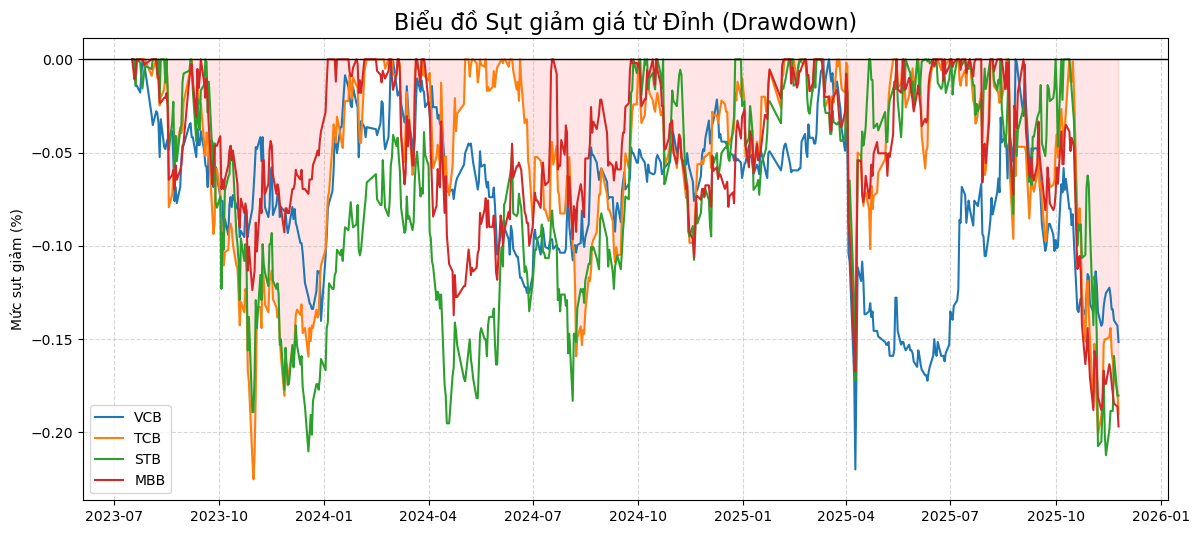

Mức sụt giảm kỷ lục (Max Drawdown) của từng ngân hàng:
HDB   -0.317073
VPB   -0.288486
BID   -0.278226
TCB   -0.225175
VCB   -0.219911
STB   -0.212295
CTG   -0.207503
MBB   -0.196837
LPB   -0.193376
ACB   -0.181989
dtype: float64


In [9]:
# 1. Tính mức đỉnh lũy kế (Cumulative Max)
rolling_max = df_merged.cummax()
# 2. Tính mức sụt giảm từ đỉnh (Drawdown)
daily_drawdown = df_merged / rolling_max - 1.0
# 3. Tìm mức sụt giảm lớn nhất (Max Drawdown) của từng mã
max_daily_drawdown = daily_drawdown.cummin()

# 4. Vẽ biểu đồ (Chọn 3-4 mã tiêu biểu để đỡ rối)
top_banks = ['VCB', 'TCB', 'STB', 'MBB'] 

plt.figure(figsize=(14, 6))
for bank in top_banks:
    if bank in daily_drawdown.columns:
        plt.plot(daily_drawdown.index, daily_drawdown[bank], label=bank, linewidth=1.5)

plt.fill_between(daily_drawdown.index, daily_drawdown['TCB'], color='red', alpha=0.1) # Tô màu nền cho 1 mã biến động mạnh
plt.title('Biểu đồ Sụt giảm giá từ Đỉnh (Drawdown)', fontsize=16)
plt.ylabel('Mức sụt giảm (%)')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# In ra con số Max Drawdown cụ thể
print("Mức sụt giảm kỷ lục (Max Drawdown) của từng ngân hàng:")
print(daily_drawdown.min().sort_values())

C:\Users\Admin\AppData\Local\Temp\ipykernel_8636\1688928684.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_returns[bank], fit=norm, label=bank, hist_kws={'alpha': 0.3})
C:\Users\Admin\AppData\Local\Temp\ipykernel_8636\1688928684.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_re

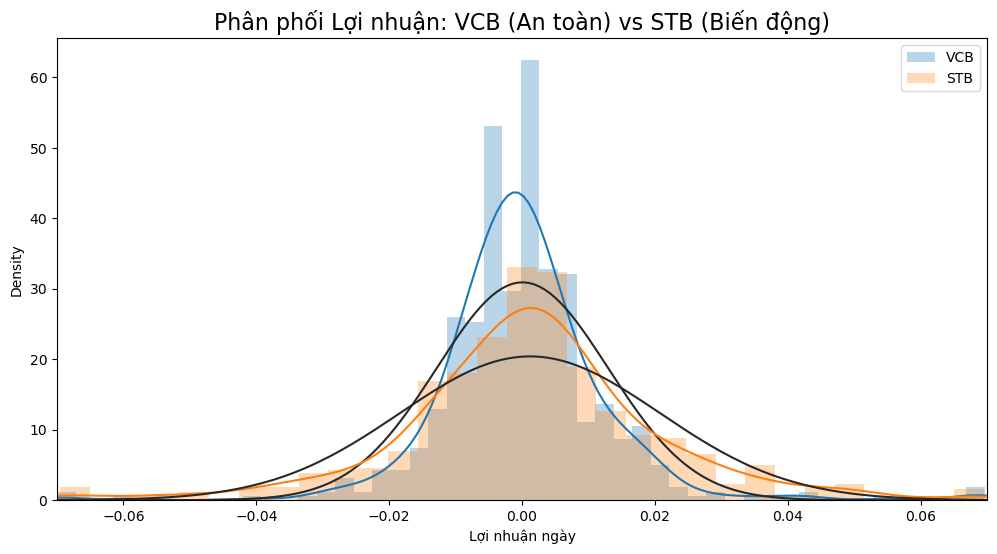

In [10]:
import seaborn as sns
from scipy.stats import norm

plt.figure(figsize=(12, 6))

# Chọn 2 mã đại diện: 1 mã an toàn (VCB) và 1 mã biến động (ví dụ STB hoặc LPB)
target_banks = ['VCB', 'STB']

for bank in target_banks:
    # Vẽ histogram
    sns.distplot(df_returns[bank], fit=norm, label=bank, hist_kws={'alpha': 0.3})

plt.title('Phân phối Lợi nhuận: VCB (An toàn) vs STB (Biến động)', fontsize=16)
plt.xlabel('Lợi nhuận ngày')
plt.legend()
plt.xlim(-0.07, 0.07) # Giới hạn trục x từ -7% đến 7% (biên độ sàn HOSE)
plt.show()

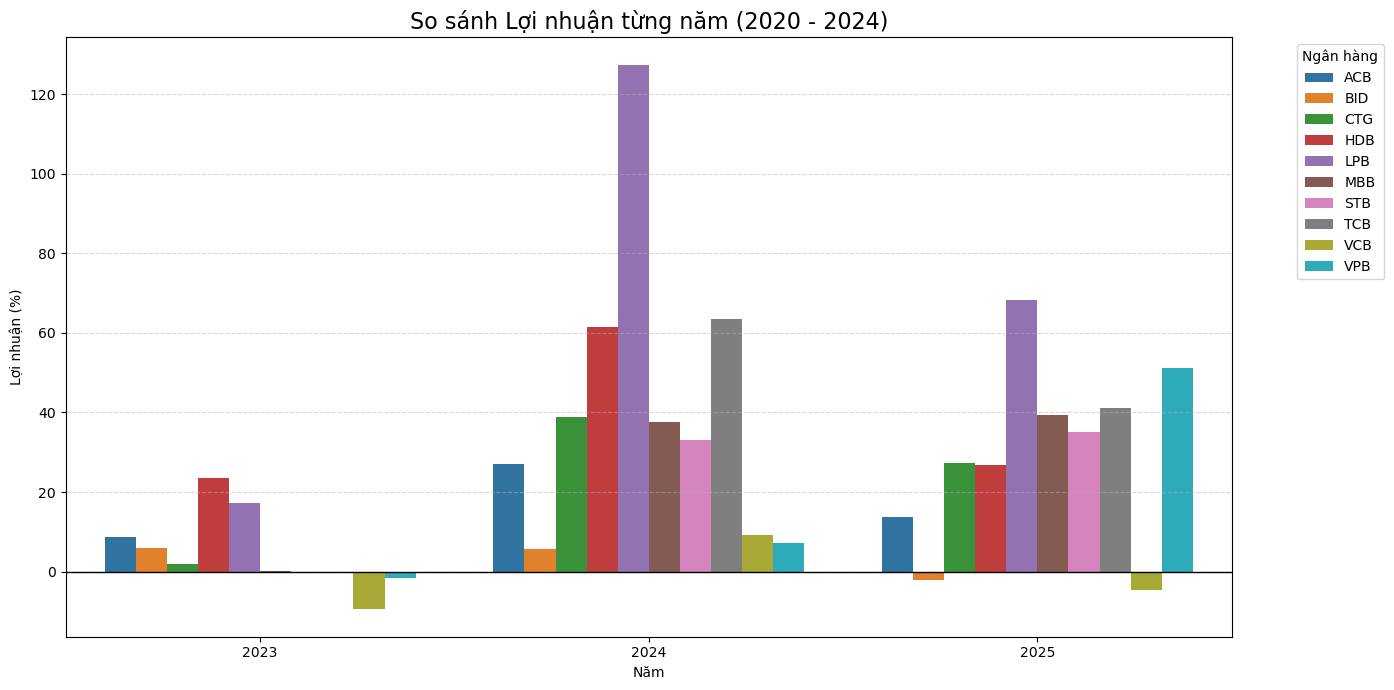

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Tính lợi nhuận theo năm (Resample theo Year 'YE' = Year End)
# Lấy giá cuối năm chia giá đầu năm - 1
yearly_returns = df_merged.resample('YE').apply(lambda x: x.iloc[-1] / x.iloc[0] - 1) * 100

# 2. Chuyển đổi dữ liệu để vẽ (Melt dataframe)
yearly_melted = yearly_returns.reset_index().melt(id_vars='Date', var_name='Bank', value_name='Return')
yearly_melted['Year'] = yearly_melted['Date'].dt.year

# 3. Vẽ biểu đồ
plt.figure(figsize=(14, 7))
sns.barplot(data=yearly_melted, x='Year', y='Return', hue='Bank', palette='tab10')

plt.title('So sánh Lợi nhuận từng năm (2020 - 2024)', fontsize=16)
plt.ylabel('Lợi nhuận (%)')
plt.xlabel('Năm')
plt.axhline(0, color='black', linewidth=1) # Đường kẻ ngang mốc 0%
plt.legend(title='Ngân hàng', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

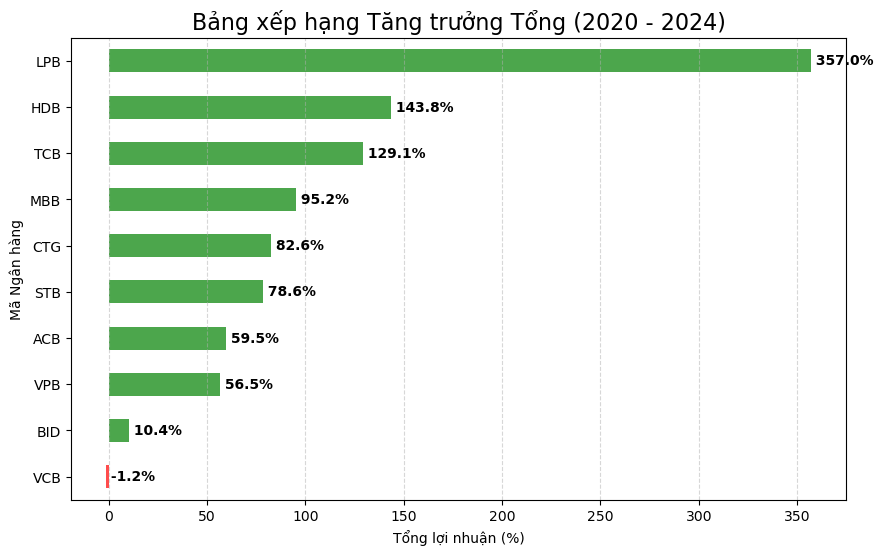

In [12]:
# 1. Tính tổng tăng trưởng từ ngày đầu đến ngày cuối
total_return = (df_merged.iloc[-1] / df_merged.iloc[0] - 1) * 100
total_return = total_return.sort_values(ascending=True) # Sắp xếp tăng dần

# 2. Vẽ biểu đồ
plt.figure(figsize=(10, 6))
# Tạo list màu: Mã nào dương màu xanh, âm màu đỏ
colors = ['red' if x < 0 else 'green' for x in total_return]

total_return.plot(kind='barh', color=colors, alpha=0.7)

plt.title('Bảng xếp hạng Tăng trưởng Tổng (2020 - 2024)', fontsize=16)
plt.xlabel('Tổng lợi nhuận (%)')
plt.ylabel('Mã Ngân hàng')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Hiển thị số % ngay trên đầu cột
for index, value in enumerate(total_return):
    plt.text(value, index, f" {value:.1f}%", va='center', fontweight='bold')

plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_8636\449878745.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=monthly_seasonality.index, y=monthly_seasonality.values, palette='viridis')


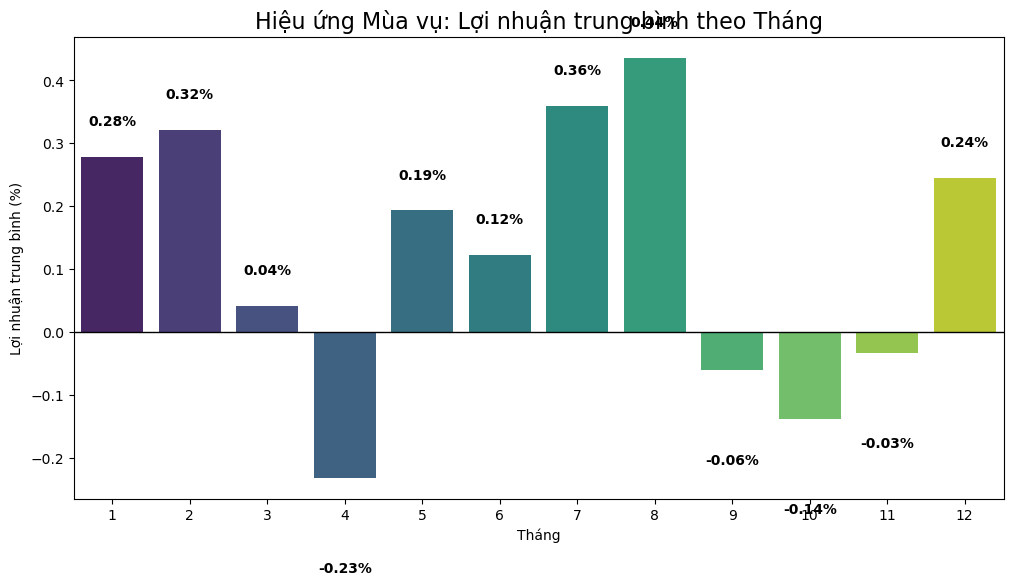

In [13]:
# 1. Tính lợi nhuận theo tháng của toàn bộ danh mục (trung bình cộng các mã)
df_returns['Month'] = df_returns.index.month # Tạo cột tháng
monthly_seasonality = df_returns.groupby('Month').mean().mean(axis=1) * 100 # Tính trung bình lợi nhuận theo tháng

# 2. Vẽ biểu đồ
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=monthly_seasonality.index, y=monthly_seasonality.values, palette='viridis')

plt.title('Hiệu ứng Mùa vụ: Lợi nhuận trung bình theo Tháng', fontsize=16)
plt.xlabel('Tháng')
plt.ylabel('Lợi nhuận trung bình (%)')
plt.axhline(0, color='black', linewidth=1)

# Gán nhãn giá trị
for i, v in enumerate(monthly_seasonality.values):
    bars.text(i, v + (0.05 if v > 0 else -0.15), f"{v:.2f}%", ha='center', fontweight='bold')

plt.show()

# Xóa cột Month sau khi vẽ để không ảnh hưởng code khác
df_returns.drop(columns=['Month'], inplace=True)